In [2]:
import csv
import numpy as np
import pandas as pd
import networkx as nx
from dictonaryModel import random_edge, MarkovModel, multiplex_network, from_file
# from pymnetModel import MarkovModel

In [2]:
column_names = ["nodes", "rho", "network", "beta", "lambda", "factor", "physical_infectivity", "hidden_infectivity", "aware", "infected"]

In [3]:
try:
    with open(r"experiment6.csv", "a", newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=column_names)
        writer.writeheader()
except IOError:
    print("I/O error")

In [3]:
for network_name in ["hiv", "school", "infectious"]:
    physical_layer = from_file(network_name)
    nodes_number = len(physical_layer.nodes())
    hidden_layer = physical_layer.copy()
    for i in range(400):
        hidden_layer = random_edge(hidden_layer)
    network = multiplex_network(nodes_number, physical_layer, hidden_layer)
    model = MarkovModel(nodes_number, network,  rho=0.2)
    model.set_level(1)
    model.set_factor(0.01)
    for physical_prob in np.round(np.linspace(0, 1, 11), 2):
        model.set_physical_trans_prob(physical_prob)
        for hidden_prob in np.round(np.linspace(0, 1, 11), 2):
            model.set_hidden_trans_prob(hidden_prob)
            for infectivity in progressbar.progressbar(np.round(np.linspace(0,1,11), 2)):
                model.set_infectivity(infectivity)
                for _lambda in np.round(np.linspace(0,1,11), 2):
                    model.set_lambda(_lambda)
                    reasult = {"nodes": len(physical_layer.nodes()), "rho": 0.2,
                        "network": network_name, "beta": infectivity, 
                        "lambda": _lambda, "factor": 0.01,
                        "physical_infectivity": physical_prob,
                        "hidden_infectivity": hidden_prob,
                        "aware": 0, "infected": 0
                        }
                    model.init_simulation()
                    model.run()
                    reasult["infected"] = np.mean(np.array(model.I_t) / nodes_number)
                    reasult["aware"] = np.mean(np.array(model.A_t) / nodes_number) 
                    try:
                        with open(r"experiment6.csv", "a") as csvfile:
                            writer = csv.DictWriter(csvfile, fieldnames=column_names)
                            writer.writerow(reasult)
                    except IOError:
                        print("I/O error")

100% (11 of 11) |########################| Elapsed Time: 0:05:03 Time:  0:05:03
100% (11 of 11) |########################| Elapsed Time: 0:04:56 Time:  0:04:56
100% (11 of 11) |########################| Elapsed Time: 0:04:48 Time:  0:04:48
100% (11 of 11) |########################| Elapsed Time: 0:04:50 Time:  0:04:50
100% (11 of 11) |########################| Elapsed Time: 0:04:52 Time:  0:04:52
100% (11 of 11) |########################| Elapsed Time: 0:04:55 Time:  0:04:55
100% (11 of 11) |########################| Elapsed Time: 0:05:00 Time:  0:05:00
100% (11 of 11) |########################| Elapsed Time: 0:05:03 Time:  0:05:03
100% (11 of 11) |########################| Elapsed Time: 0:05:06 Time:  0:05:06
100% (11 of 11) |########################| Elapsed Time: 0:05:09 Time:  0:05:09
100% (11 of 11) |########################| Elapsed Time: 0:05:14 Time:  0:05:14
100% (11 of 11) |########################| Elapsed Time: 0:05:01 Time:  0:05:01
100% (11 of 11) |#######################

In [5]:
# for nodes_number in [100, 1000]:
#     physical_layer = nx.barabasi_albert_graph(nodes_number, 5)
#     hidden_layer = physical_layer.copy()
#     for i in range(400):
#         hidden_layer = random_edge(hidden_layer)
#     multiplex_network = multiplex_network(nodes_number, physical_layer, hidden_layer)
#     model = MarkovModel(nodes_number, multiplex_network,  rho=0.2)
#     model.set_level(2)
#     model.set_factor(0.01)
#     for physical_prob in np.linspace(0, 1, 5):
#         model.set_physical_trans_prob(physical_prob)
#         for hidden_prob in np.linspace(0, 1, 5):
#             model.set_hidden_trans_prob(hidden_prob)
#             for infectivity in np.linspace(0, 1, 20):
#                 model.set_infectivity(infectivity)
#                 for _lambda in np.linspace(0, 1, 10):
#                     model.set_lambda(_lambda)
#                     reasult = {"nodes": nodes_number, "rho": 0.2, "network": "barabassi", "factor": 0.01,
#                                 "beta": infectivity, "lambda": _lambda, "physical_infectivity": physical_prob,
#                                 "hidden_infectivity": hidden_prob, "aware": 0, "infected": 0}
#                     model.init_simulation()
#                     model.run()
#                     reasult["infected"] = np.mean(model.I_t)/nodes_number
#                     reasult["aware"] = np.mean(model.A_t)/nodes_number
#                     writer = csv.DictWriter(csvfile, fieldnames=column_names)
#                     writer.writerow(reasult)

In [6]:
# df.to_csv("experiment3.csv")

In [7]:
# for nodes_number in [100]:
#     physical_layer = nx.barabasi_albert_graph(nodes_number, 5)
#     hidden_layer = physical_layer.copy()
#     for i in range(400):
#         hidden_layer = random_edge(hidden_layer)
#     model = MarkovModel(nodes_number, physical_layer, hidden_layer, rho=0.2)
#     model.set_level(2)
#     model.set_factor(0.01)
#     for physical_prob in np.linspace(0, 1, 5):
#         model.set_physical_trans_prob(physical_prob)
#         for hidden_prob in np.linspace(0, 1, 5):
#             model.set_hidden_trans_prob(hidden_prob)
#             for infectivity in np.linspace(0, 1, 20):
#                 model.set_infectivity(infectivity)
#                 for _lambda in np.linspace(0, 1, 10):
#                     model.set_lambda(_lambda)
#                     reasult = {"nodes": nodes_number, "rho": 0.2, "network": "barabassi", "factor": 0.01,
#                                 "beta": infectivity, "lambda": _lambda, "physical_infectivity": 0.4,
#                                 "hidden_infectivity": 0.6, "aware": 0, "infected": 0}
#                     model.init_simulation()
#                     model.run()
#                     reasult["infected"] = np.mean(model.I_t)/nodes_number
#                     reasult["aware"] = np.mean(model.A_t)/nodes_number
#                     df = df.append(reasult, ignore_index=True)
        

In [8]:
# df.to_csv("experiment.csv")

In [9]:
    # for physical_prob in np.linspace(0, 1, 5):
    #     model.set_physical_trans_prob(physical_prob)
    #     for hidden_prob in np.linspace(0, 1, 5):
    #         model.set_hidden_trans_prob(hidden_prob)

<ipython-input-2-e9603db487ec>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


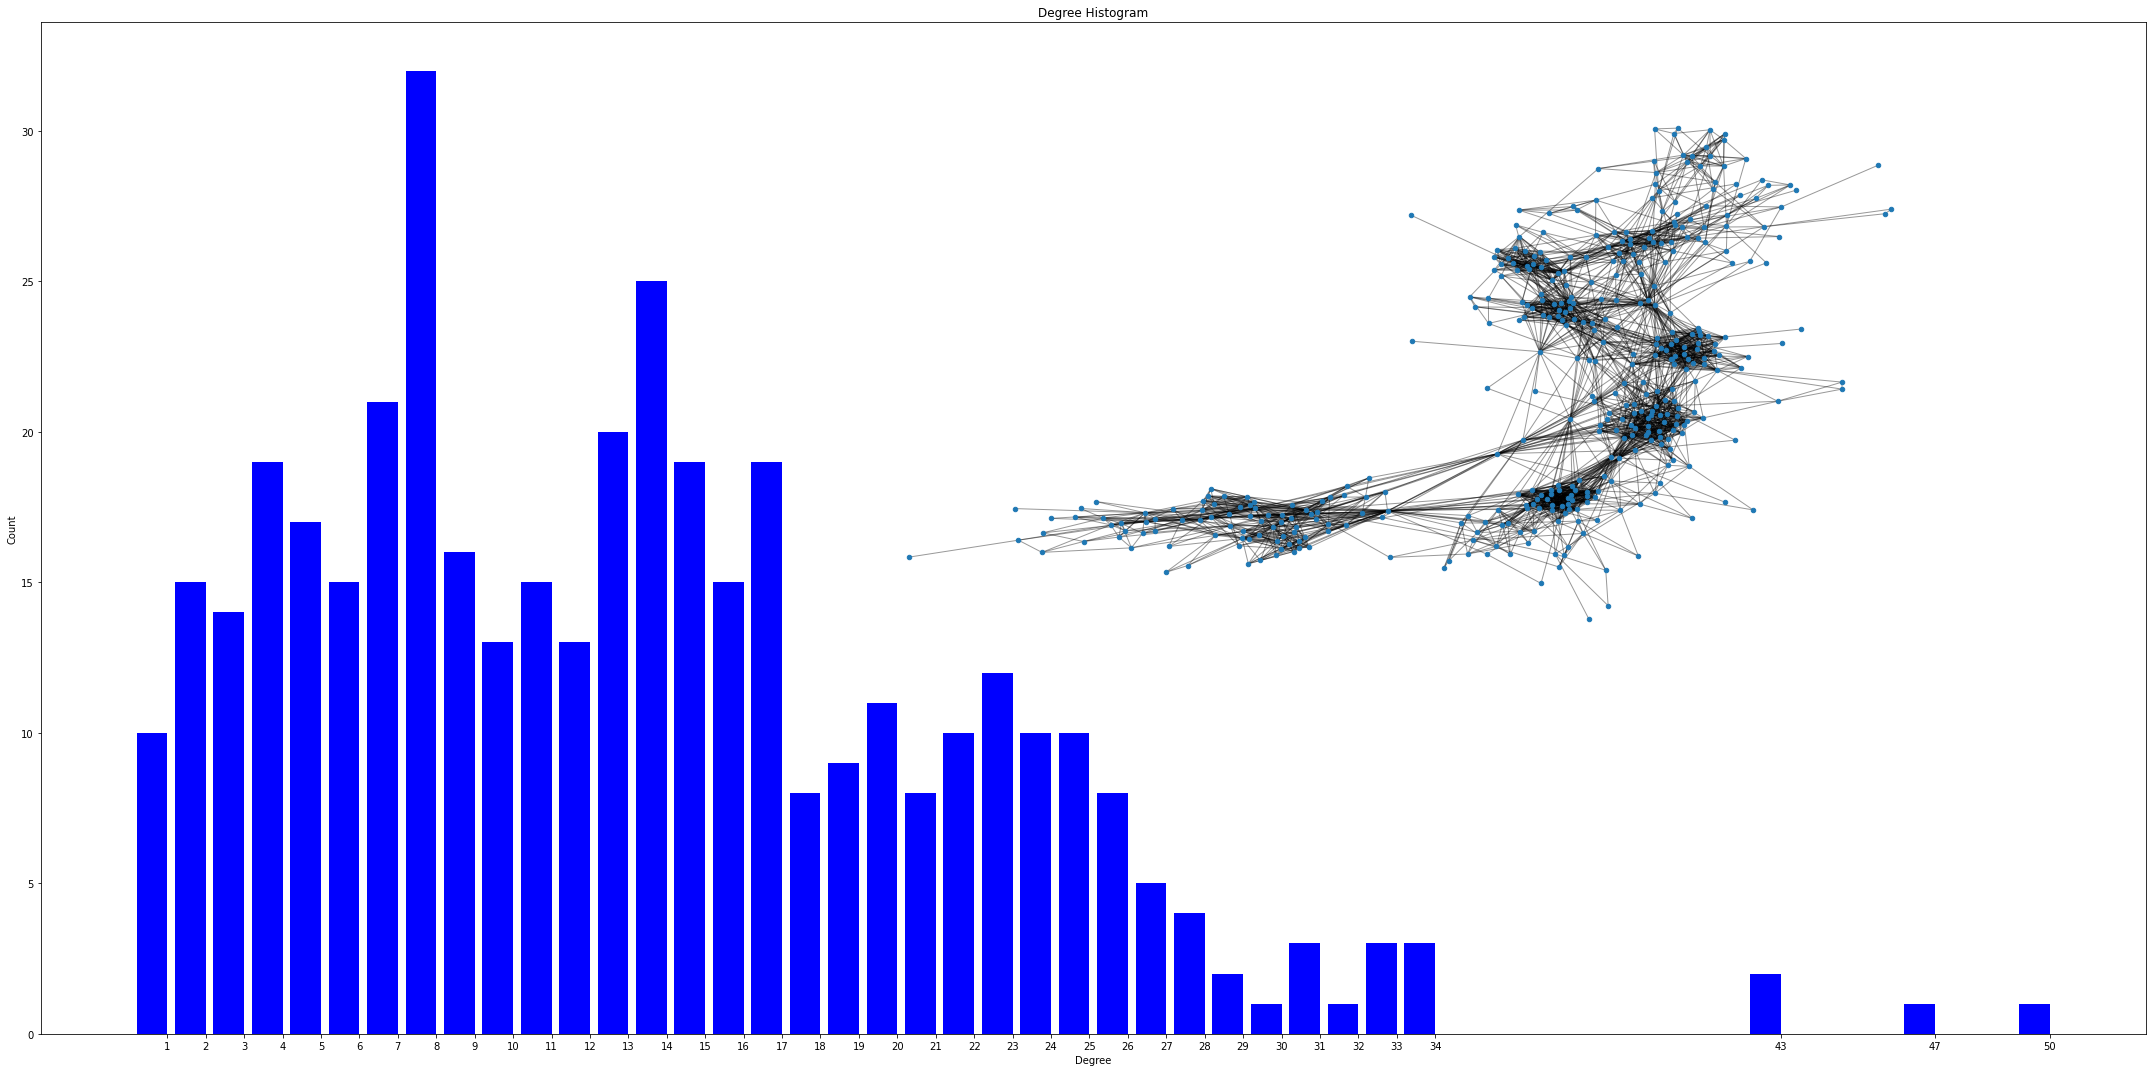

In [2]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
from dictonaryModel import random_edge, MarkovModel, multiplex_network, from_file

G = from_file("infectious")

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(30,15))
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.tight_layout()
#plt.savefig("plots/networks/barabassi1000Network2.pdf")

In [67]:
import networkx as nx
import EoN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dictonaryModel import random_edge, MarkovModel, multiplex_network, from_file

reasult = {"nodes": [], "network": [], 'gamma': [], 'tau': [], 'infected': [], 'sustainable': []}
for network in [100, 1000, 'hiv', 'infectious', 'school']:
    if type(network) == str:
        physical_layer = from_file(network)
    else:
        physical_layer = nx.barabasi_albert_graph(network, 16)
    nodes_number = len(physical_layer.nodes())
    for gamma in np.round(np.linspace(0.1, 1, 10), 2):
        for tau in np.round(np.linspace(0, 1, 11), 2):
            t, S, I = EoN.Gillespie_SIS(physical_layer, tau, gamma, tmax = 10,
                                        initial_infecteds = range(20))
            if type(network) == int:
                reasult['network'].append(f"barabassi{str(network)}")
            else:
                reasult['network'].append(network)
            reasult['nodes'].append(nodes_number)
            reasult['gamma'].append(gamma)
            reasult['tau'].append(tau)
            reasult['infected'].append(np.round(I[-1]/nodes_number, 2))
            reasult['sustainable'].append(S[-1])

df = pd.DataFrame(data=reasult)
df_hiv = df.loc[(df['nodes'] == 40)]
df_school = df.loc[(df['nodes'] == 70)]
df_infectious = df.loc[(df['nodes'] == 410)]
df_houndred = df.loc[(df['nodes'] == 100)]
df_thousand = df.loc[(df['nodes'] == 1000)]
infected_pivot_houndred = df_houndred.pivot(columns='tau', index='gamma', values='infected')
infected_pivot_thousand = df_thousand.pivot(columns='tau', index='gamma', values='infected')
infected_pivot_hiv = df_hiv.pivot(columns='tau', index='gamma', values='infected')
infected_pivot_school = df_school.pivot(columns='tau', index='gamma', values='infected')
infected_pivot_infectious = df_infectious.pivot(columns='tau', index='gamma', values='infected')

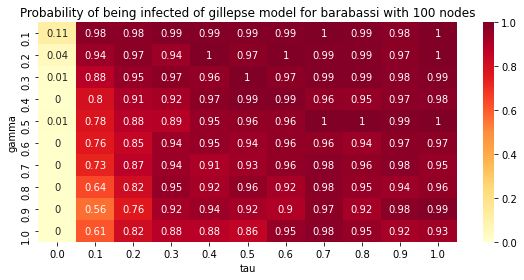

In [68]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_houndred, annot=True, vmax=infected_pivot_houndred.max().max(), vmin=infected_pivot_houndred.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for barabassi with 100 nodes')
plt.tight_layout()
plt.savefig("plots/gillepse/barabassi100.pdf")

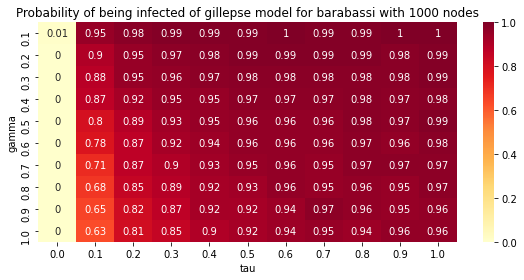

In [69]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_thousand, annot=True, vmax=infected_pivot_thousand.max().max(), vmin=infected_pivot_thousand.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for barabassi with 1000 nodes')
plt.tight_layout()
plt.savefig("plots/gillepse/barabassi1000.pdf")

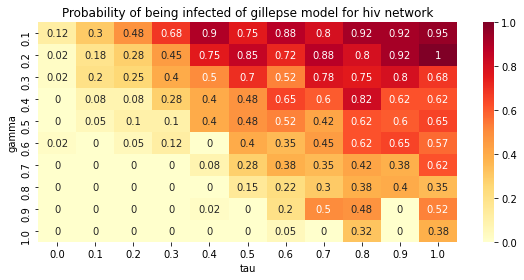

In [70]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_hiv, annot=True, vmax=infected_pivot_thousand.max().max(), vmin=infected_pivot_thousand.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for hiv network')
plt.tight_layout()
plt.savefig("plots/gillepse/hiv.pdf")

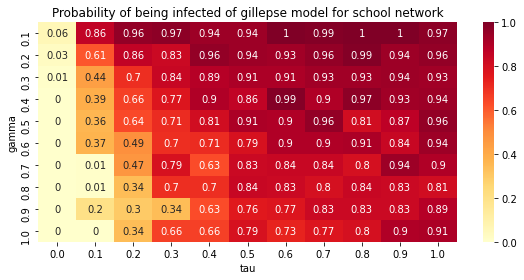

In [71]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_school, annot=True, vmax=infected_pivot_thousand.max().max(), vmin=infected_pivot_thousand.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for school network')
plt.tight_layout()
plt.savefig("plots/gillepse/school.pdf")

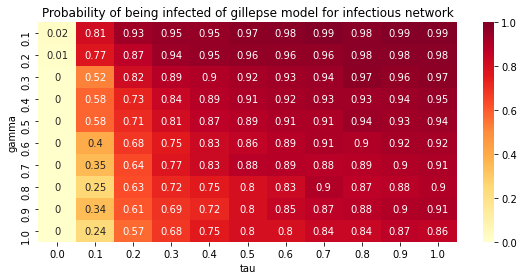

In [72]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_infectious, annot=True, vmax=infected_pivot_thousand.max().max(), vmin=infected_pivot_thousand.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for infectious network')
plt.tight_layout()
plt.savefig("plots/gillepse/infectious.pdf")